In [205]:
'''
load data
'''
import numpy as np 

IR_list_file = "/Users/dale/OneDrive/Data/cluster_select/train/all_IR_p_npy.txt"
# IR_list_file = "/Users/dale/OneDrive/Data/cluster_select/test/all_IR_p_npy.txt"
# IR_list_file = "/Users/dale/OneDrive/Data/cluster_select/test/all_IR_p_npy_resnet10.txt"
# IR_list_file = "/Users/dale/OneDrive/Data/cluster_select/train/all_IR_p_npy_resnet10.txt"
VIS_list_file = "/Users/dale/OneDrive/Data/cluster_select/train/all_VIS_npy.txt"
# VIS_list_file = "/Users/dale/OneDrive/Data/cluster_select/test/all_VIS_npy.txt"

with open(IR_list_file,'r') as f:
    IR_list = f.readlines()
with open(VIS_list_file,'r') as f:
    VIS_list = f.readlines()

IR_ft_list = []
VIS_ft_list = []

for line in IR_list:
    filename = line.strip()
    IR_ft = np.load(filename)
    IR_ft_list.append(IR_ft)
    
for line in VIS_list:
    filename = line.strip()
    VIS_ft = np.load(filename)
    VIS_ft_list.append(VIS_ft)
    
IR_ft_list = np.array(IR_ft_list)
VIS_ft_list = np.array(VIS_ft_list)

In [206]:
IR_ft_list.shape

(144, 512)

In [207]:
# IR_ft_list.shape
# IR_ft
IR_label = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30, 30, 30, 30, 30, 52, 52, 52, 52, 52, 52, 52, 52, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186]


VIS_label = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 152, 170, 170, 170, 170, 170, 170, 186, 186, 186, 186, 186, 186, 186]



#for test
# IR_label = [5, 5, 5, 5, 5, 5, 5, 5, 5, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 95, 95, 95, 95, 95, 95, 95, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 225, 225, 225, 225, 225, 225, 225, 225]
# VIS_label = [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 115, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225]

In [208]:
def relabel(label):
    origin_label = label
    new_label = []
    tmp = dict()
    label_set = sorted(list(set(label)))
    for idx, item in enumerate(label_set):
        if item not in tmp.keys():
            tmp[item] = idx
    for item in origin_label:
        new_label.append(tmp[item])
    return new_label

IR_label_new = relabel(IR_label)
VIS_label_new = relabel(VIS_label)


In [209]:
IR_label_new

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9]

In [210]:
# all_label = np.concatenate((IR_label, VIS_label), axis=0)
all_label = np.concatenate((IR_label_new, VIS_label_new), axis=0)
all_ft_list = np.concatenate((IR_ft_list, VIS_ft_list), axis=0)


# all_label = IR_label_new
# all_ft_list = IR_ft_list

# all_label = VIS_label_new
# all_ft_list = VIS_ft_list
print(IR_ft_list.shape)
print(all_label.shape)
print(all_ft_list.shape)

(144, 512)
(331,)
(331, 512)


ValueError: 'c' argument has 187 elements, which is inconsistent with 'x' and 'y' with size 24.

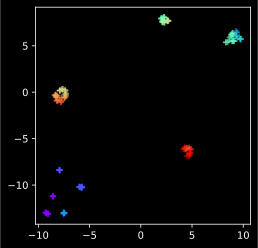

In [152]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris,load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = "svg"

# digits = load_digits()
digits = all_ft_list
X_tsne = TSNE(n_components=2, random_state=33).fit_transform(digits)
X_pca = PCA(n_components=2).fit_transform(digits)

font = {"color": "darkred",
        "size": 13, 
        "family" : "serif"}

plt.style.use("dark_background")
plt.figure(figsize=(8.5, 4)) 
plt.subplot(1, 2, 1) 
plt.scatter(X_tsne[:144, 0], X_tsne[:144, 1], c=all_label[:144], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="+")
plt.scatter(X_tsne[144:, 0], X_tsne[144:, 1], c=all_label[144:], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="o")
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(10)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 9.5)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:144, 0], X_pca[:144, 1], c=all_label[:144], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="+")
plt.scatter(X_pca[144:, 0], X_pca[144:, 1], c=all_label[144:], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="o")
plt.title("PCA", fontdict=font)
cbar = plt.colorbar(ticks=range(10)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 9.5)
plt.tight_layout()

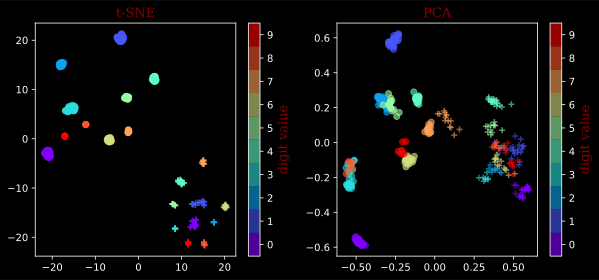

In [211]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris,load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = "svg"

# digits = load_digits()
digits = all_ft_list

X_pca = PCA(n_components=128).fit_transform(digits)
# X_tsne = TSNE(n_components=2, random_state=33).fit_transform(digits)
X_tsne = TSNE(n_components=2, random_state=33).fit_transform(X_pca)

font = {"color": "darkred",
        "size": 13, 
        "family" : "serif"}

plt.style.use("dark_background")
plt.figure(figsize=(8.5, 4)) 
plt.subplot(1, 2, 1) 
plt.scatter(X_tsne[:144, 0], X_tsne[:144, 1], c=all_label[:144], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="+")
plt.scatter(X_tsne[144:, 0], X_tsne[144:, 1], c=all_label[144:], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="o")
plt.title("t-SNE", fontdict=font)
cbar = plt.colorbar(ticks=range(10)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 9.5)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:144, 0], X_pca[:144, 1], c=all_label[:144], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="+")
plt.scatter(X_pca[144:, 0], X_pca[144:, 1], c=all_label[144:], alpha=0.6, 
            cmap=plt.cm.get_cmap('rainbow', 10), marker="o")
plt.title("PCA", fontdict=font)
cbar = plt.colorbar(ticks=range(10)) 
cbar.set_label(label='digit value', fontdict=font)
plt.clim(-0.5, 9.5)
plt.tight_layout()

In [69]:
# X_pca.shape
X_tsne.shape

(331, 2)

Computing t-SNE embedding


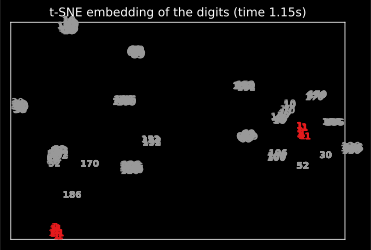

In [59]:
# coding='utf-8'
"""t-SNE对手写数字进行可视化"""
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.manifold import TSNE


def get_data():
#     digits = datasets.load_digits(n_class=6)
#     data = IR_ft_list
#     data = VIS_ft_list
    data = all_ft_list
#     label = IR_label
#     label = VIS_label
    label = all_label
    n_samples, n_features = VIS_ft_list.shape
    return data, label, n_samples, n_features


def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)

    fig = plt.figure()
    ax = plt.subplot(111)
    for i in range(data.shape[0]):
        plt.text(data[i, 0], data[i, 1], str(label[i]),
                 color=plt.cm.Set1(label[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    return fig


def main():
    data, label, n_samples, n_features = get_data()
    print('Computing t-SNE embedding')
    tsne = TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    result = tsne.fit_transform(data)
    fig = plot_embedding(result, label,
                         't-SNE embedding of the digits (time %.2fs)'
                         % (time() - t0))
    plt.show(fig)


if __name__ == '__main__':
    main()